In [31]:
# import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [32]:
download = pd.read_csv('data2/download.csv')
tag = pd.read_csv('data2/tag.csv')
user = pd.read_csv('data2/user.csv')

In [33]:
download_song = download[download['model_type'] == 'Music::Song']
tag_song = tag[tag['model_type'] == 'Music::Song']

In [34]:
dl_song_cnt = download_song.groupby('model_id', as_index=False)['model_type'].count().sort_values(by = 'model_type', ascending = False, ignore_index = True)
dl_song_cnt.columns = ['model_id', 'cnt_dl']

In [35]:
dl_song_cnt_drop = dl_song_cnt.drop(index = dl_song_cnt[dl_song_cnt['cnt_dl'] < 100].index)
dl_song_cnt_drop

,model_id,cnt_dl
0,4132,6672
1,6154,2941
2,6163,2295
3,6219,2074
4,6255,1935
...,...,...
484,7127,101
485,6976,101
486,6906,101
487,7070,100


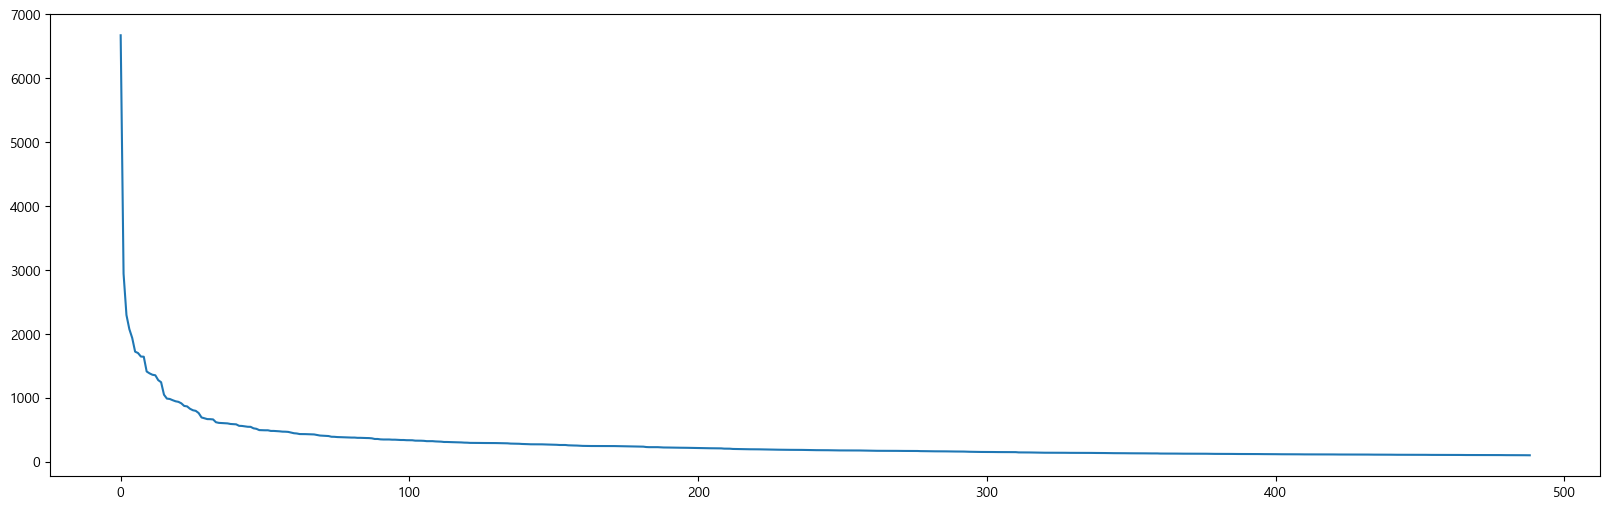

In [36]:
plt.figure(figsize=(20,6))
plt.plot(dl_song_cnt_drop['cnt_dl'])

In [37]:
tag_song = tag_song[['name', 'model_id']]
tag_song.drop(index = tag_song[tag_song['name'].isnull() == True].index, axis=0, inplace=True)

dl_song_cnt_tag_merge = dl_song_cnt_drop.merge(right=tag_song, left_on='model_id', right_on='model_id')
dl_song_cnt_tag_merge

,model_id,cnt_dl,name
0,4132,6672,포크 및 어쿠스틱
1,4132,6672,편안함
2,4132,6672,기쁜
3,4132,6672,가벼운
4,4132,6672,밝은
...,...,...,...
9263,6866,100,마림바
9264,6866,100,호기심
9265,6866,100,첫사랑
9266,6866,100,연애


In [38]:
# tag_list 생성, head(n) >> 태그 갯수를 상위 n개까지 설정

tag_list = dl_song_cnt_tag_merge['name']
tag_list

tag_list = dl_song_cnt_tag_merge['name'].value_counts().head(100).index

In [39]:
dl_song_cnt_tag_merge['name'].value_counts().head(100)

키즈&펫방     304
밝은        250
일상        233
토크        183
편안한       164
         ... 
설레는        17
힘내는        17
uplift     17
매드무비       17
어린이        16
Name: name, Length: 100, dtype: int64

In [40]:
tag_song_list = dl_song_cnt_tag_merge.groupby('model_id')['name'].apply(list) # as_index = False 불가능 (why?) >> 아래 단계 추가

# series to dataframe, index 초기화
tag_song_list = pd.DataFrame(tag_song_list)
tag_song_list['model_id'] = tag_song_list.index
tag_song_list.reset_index(drop=True, inplace=True)
tag_song_list

,name,model_id
0,"[키즈&펫방, 키즈&펫방, 귀여운]",16
1,"[일렉트로닉, 오프닝, 밝은, 신남, 비트, 여행Vlog, 빠른]",2630
2,"[팝, 키즈&펫방, 키즈&펫방, 기쁜, 일상, 귀여운]",2647
3,"[일렉트로닉, 오프닝, 키즈&펫방, 키즈&펫방, 기쁜, 일상, 여행Vlog]",2690
4,"[일렉트로닉, 오프닝, 스포츠, 게임방송, 매드무비, 밝은, 여행Vlog, 장면전환]",2717
...,...,...
481,"[록, 펑크(Funk), 역동적, 스포츠, 매드무비, 오프닝, 빠른, 광고음악, C...",9015
482,"[얼터너티브, 코믹, 빠른, 상황극, 바쁜, 우당탕탕, 엉뚱, 흥미로운, 웹드라마,...",9029
483,"[피아노, 일상, 귀여운, 실로폰, 아기자기, 브이로그, 뽀짝한, 사랑스러운, 기분좋은]",9032
484,"[피아노, 역동적, 예능, 빠른, 바쁜, 긴박한, 분주한, 초조한, 추격전, 타임랩...",9132


In [41]:
# 태그별 열 생성 후 존재 여부에 따라 데이터 입력

for i in tag_list:
    tag_song_list[i]=tag_song_list['name'].apply(lambda x: 1 if i in x else 0)
tag_song_list.drop(columns='name', axis=1, inplace=True)
tag_song_list.head()

C:\Users\jhc74\AppData\Local\Temp\ipykernel_25456\3216616737.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tag_song_list[i]=tag_song_list['name'].apply(lambda x: 1 if i in x else 0)
C:\Users\jhc74\AppData\Local\Temp\ipykernel_25456\3216616737.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tag_song_list[i]=tag_song_list['name'].apply(lambda x: 1 if i in x else 0)


,model_id,키즈&펫방,밝은,일상,토크,편안한,가벼운,귀여운,잔잔,역동적,...,봄,기타,film,soundtrack,엉뚱,설레는,힘내는,uplift,매드무비,어린이
0,16,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2630,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2647,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2690,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2717,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
tag_song_list.sum().sort_values(ascending=False)

model_id    2928995
밝은              246
일상              227
토크              179
키즈&펫방           177
             ...   
설레는              17
힘내는              17
uplift           17
어린이              16
매드무비             15
Length: 101, dtype: int64

In [43]:
# 데이터 표준화

# from sklearn.preprocessing import StandardScaler
# std_scaler=StandardScaler()
# std_scaler.fit(tag_song_list.iloc[:,1:])
# data=std_scaler.transform(tag_song_list.iloc[:,1:])

# from sklearn.decomposition import PCA
# pca=PCA(n_components=2)
# pca.fit(data)
# data_pca=pca.transform(data)
# data_pca.shape

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(tag_song_list.iloc[:,1:])
data_pca=pca.transform(tag_song_list.iloc[:,1:])
data_pca.shape

(486, 2)

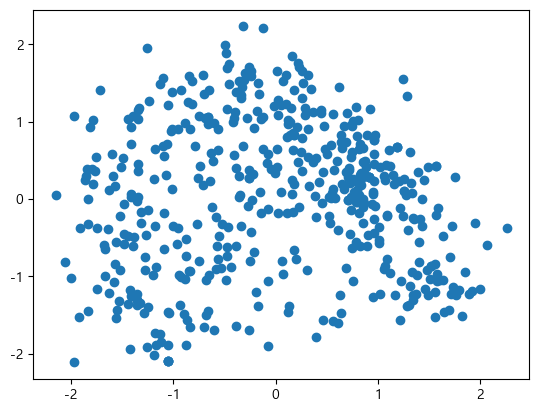

In [44]:
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.show()

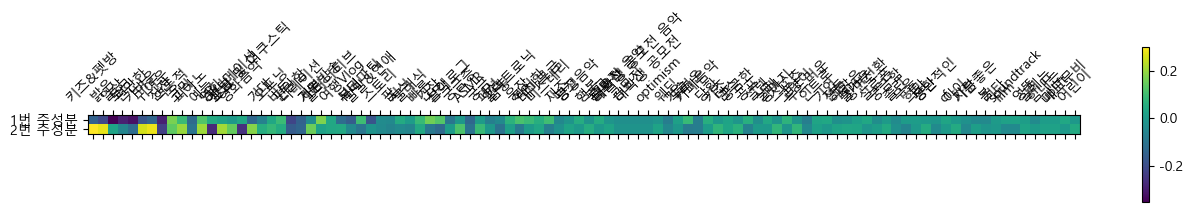

In [45]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1번 주성분','2번 주성분'])
plt.colorbar()
plt.xticks(range(100), tag_song_list.columns[1:], rotation=45)
plt.show()

c:\Users\jhc74\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


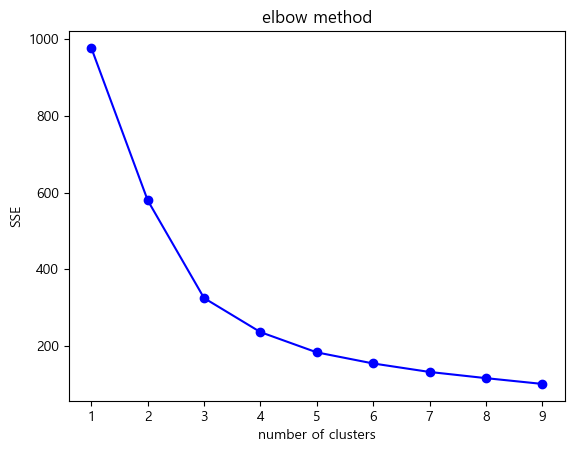

In [46]:
from sklearn.cluster import KMeans
df_data_pca = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(df_data_pca,10)

In [47]:
km = KMeans(n_clusters = 3,random_state=0)
df_data_pca['cluster_kmeans']= km.fit_predict(df_data_pca)
df_data_pca

,PC1,PC2,cluster_kmeans
0,0.428924,0.212929,1
1,0.692016,0.344458,1
2,-0.002176,0.333308,2
3,0.162908,0.247442,2
4,0.804367,0.043730,1
...,...,...,...
481,1.213385,-0.123583,1
482,0.943176,-0.065473,1
483,-0.075166,-0.134246,1
484,0.969263,-0.085361,1


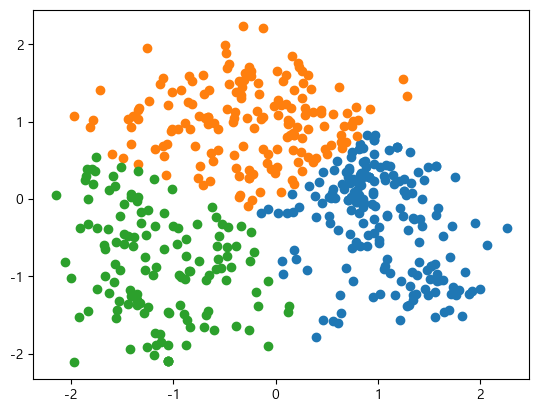

In [48]:
for i in df_data_pca['cluster_kmeans'].unique():
  data=df_data_pca[df_data_pca['cluster_kmeans']==i]
  plt.scatter(data['PC1'],data['PC2'])
plt.show()

In [49]:
tag_song_list['cluster']=list(df_data_pca['cluster_kmeans'])
tag_song_list

C:\Users\jhc74\AppData\Local\Temp\ipykernel_25456\2119939050.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tag_song_list['cluster']=list(df_data_pca['cluster_kmeans'])


,model_id,키즈&펫방,밝은,일상,토크,편안한,가벼운,귀여운,잔잔,역동적,...,기타,film,soundtrack,엉뚱,설레는,힘내는,uplift,매드무비,어린이,cluster
0,16,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2630,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2647,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,2690,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2717,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,9015,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
482,9029,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
483,9032,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
484,9132,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [50]:
for i in range(3):
    print(tag_song_list.groupby('cluster').sum().iloc[i].sort_values(ascending=False).head(10))

model_id    810904
잔잔             119
편안한            112
일상             110
토크              95
편안함             82
피아노             66
밝은              65
나레이션            62
뷰티              54
Name: 0, dtype: int64
model_id    1116489
역동적              82
게임방송             68
영화               64
예능               63
영화음악             59
긴장               56
비트               54
심각               52
코믹               51
Name: 1, dtype: int64
model_id     1001602
밝은               137
키즈&펫방            129
귀여운              117
가벼운              108
일상                99
애니메이션             75
신남                73
예능                71
포크 및 어쿠스틱         71
Name: 2, dtype: int64


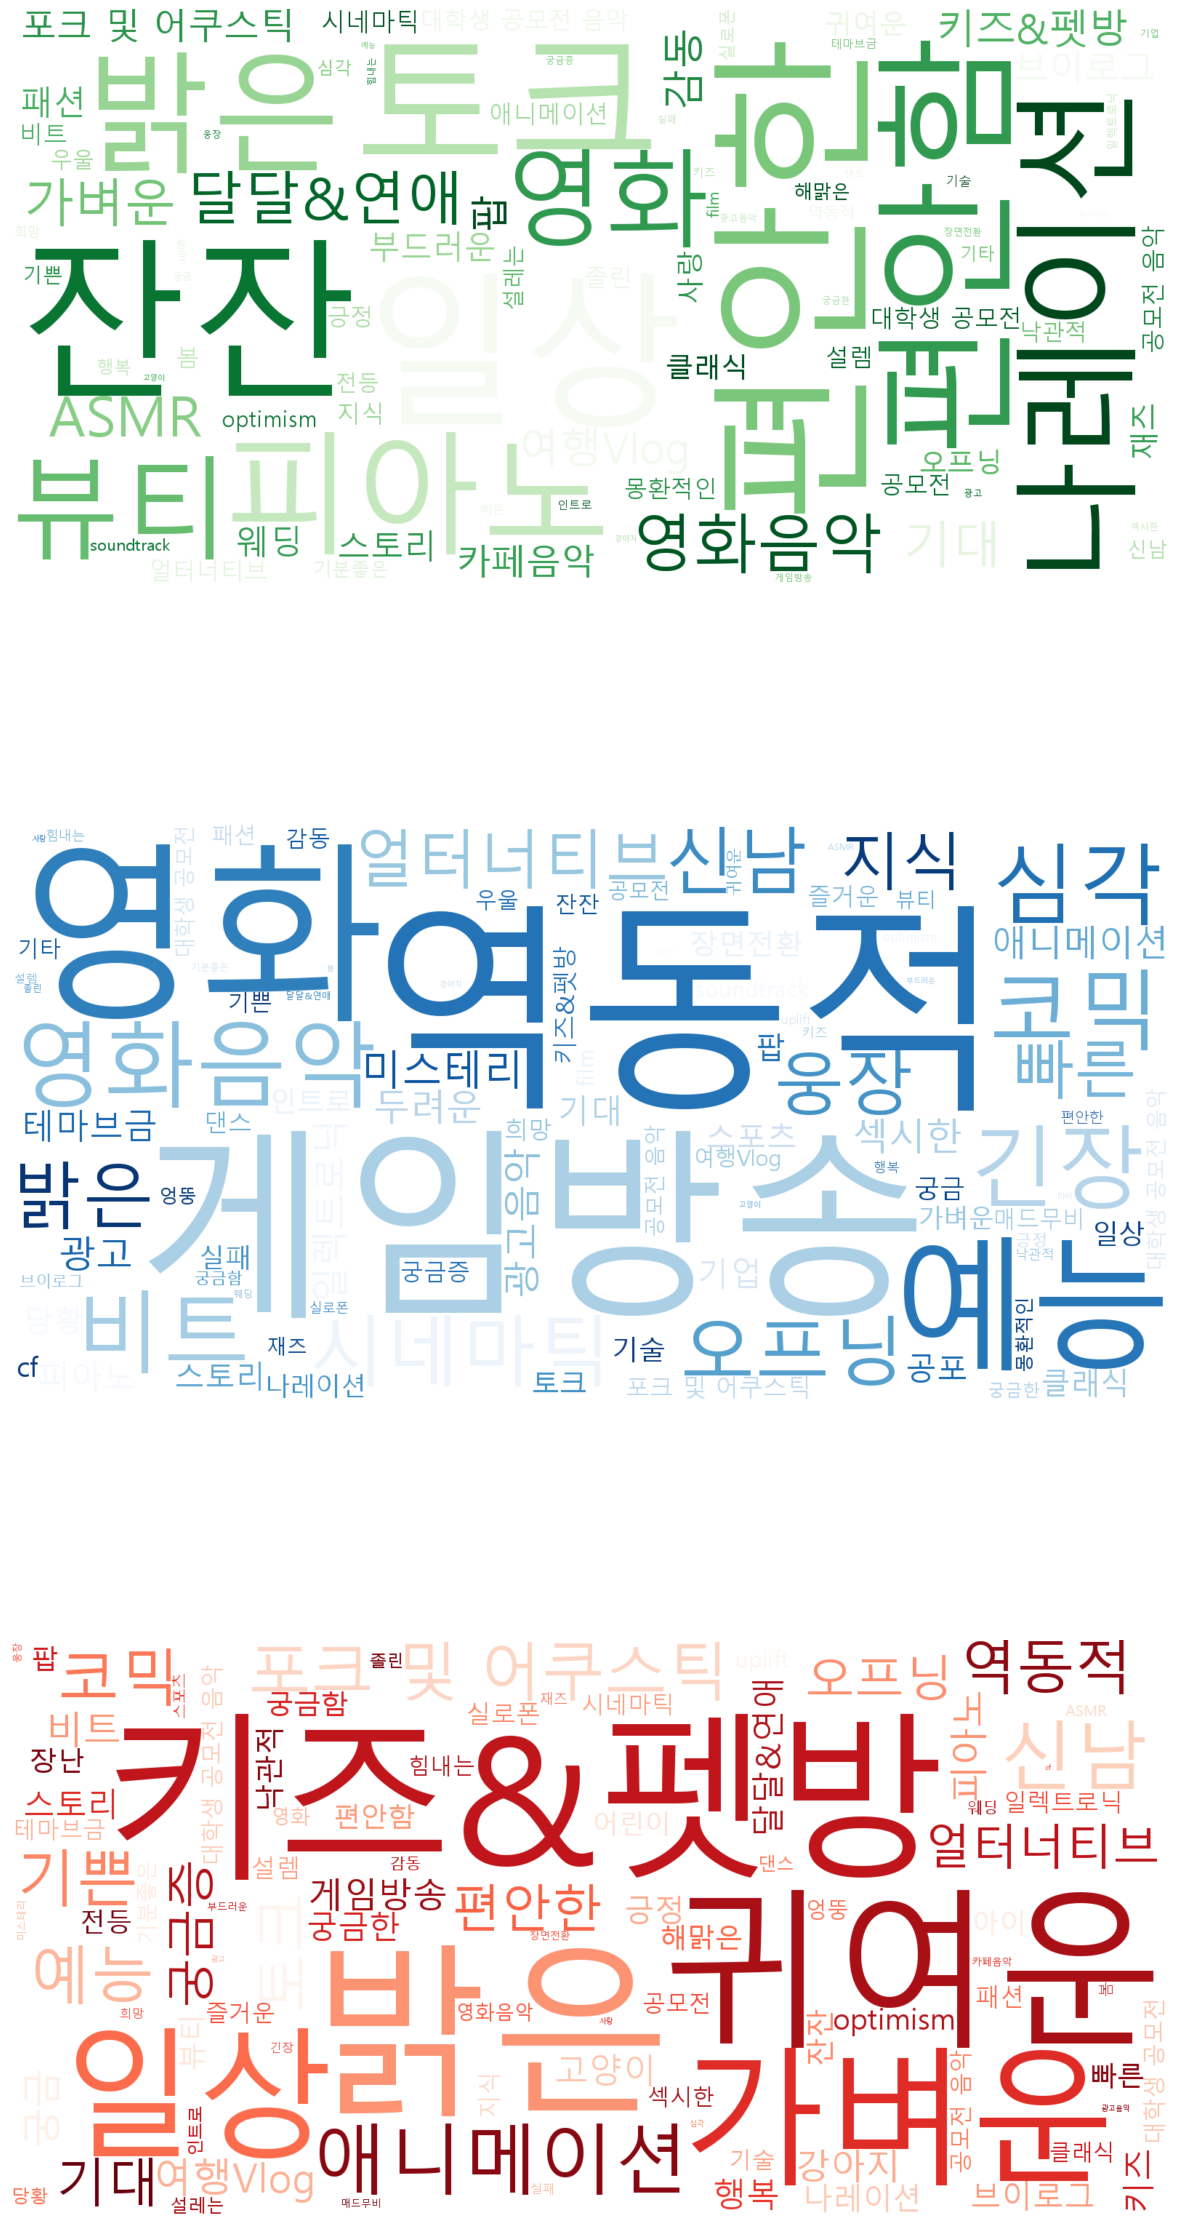

In [52]:
from wordcloud import WordCloud 
from PIL import *
plt.figure(figsize=(15,30))
palettes=['Greens_r','Blues_r','Reds_r']
for i in range(3):    
    words=tag_song_list.groupby('cluster').sum().iloc[i,1:].sort_values(ascending=False).to_dict()
    wordcloud = WordCloud(
        font_path = 'malgun.ttf',
        background_color='white',
        colormap=palettes[i],
        width=1600,
        height=800,
    ).generate_from_frequencies(words)
    plt.subplot(3,1,i+1)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
plt.show()